In [5]:


#importing dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#importing medical_df
medical_df = pd.read_csv("../../resources/medical_df.csv")

diabetes_df = medical_df[['Diabetes','Total Income per Individual',
'Lacking Health Insurance','Binge Drinking','High Blood Pressure',
'Routine Health Checkups','Currently Smoking', 
'Depression', 'No Leisure-Time Physical Activity',
"Less than 7 Hours of Sleep" ]]

diabetes_df

,Diabetes,Total Income per Individual,Lacking Health Insurance,Binge Drinking,High Blood Pressure,Routine Health Checkups,Currently Smoking,Depression,No Leisure-Time Physical Activity,Less than 7 Hours of Sleep
0,13.0,4.121429,24.8,18.4,44.0,73.2,33.0,16.9,35.5,41.0
1,3.6,5.682143,14.4,20.6,16.8,71.8,14.4,26.3,21.3,37.4
2,18.3,8.220513,20.3,17.0,36.3,69.9,43.8,20.0,37.9,35.4
3,9.8,8.305128,20.5,20.5,35.3,69.2,29.2,20.7,30.6,43.2
4,9.5,8.596297,11.8,21.5,30.3,65.5,22.4,24.7,27.0,32.7
...,...,...,...,...,...,...,...,...,...,...
26679,7.1,751.694498,3.4,15.2,28.3,67.6,6.2,21.3,11.3,22.9
26680,6.8,855.545425,7.7,20.2,25.5,67.1,11.2,17.9,14.8,26.0
26681,7.5,1035.795390,3.3,14.6,25.4,61.2,5.4,15.1,11.5,24.0
26682,8.7,1197.884536,3.0,14.1,29.9,69.0,5.8,14.6,12.6,24.7


In [7]:
train_dataset = diabetes_df.sample(frac=0.8, random_state=1)
test_dataset = diabetes_df.drop(train_dataset.index)

In [8]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Diabetes')
test_labels = test_features.pop('Diabetes')

In [9]:
#Normalization of Data
train_dataset.describe().transpose()[["mean","std"]]

,mean,std
Diabetes,11.295924,2.952410
Total Income per Individual,38.448158,33.853274
Lacking Health Insurance,10.224669,5.600154
Binge Drinking,16.593554,2.720517
High Blood Pressure,34.377290,6.158767
Routine Health Checkups,73.896065,5.004122
Currently Smoking,17.893653,4.887682
Depression,22.546288,3.467845
No Leisure-Time Physical Activity,25.993985,6.348798
Less than 7 Hours of Sleep,33.467480,3.974882


In [10]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [11]:
first = np.array(train_features[:1]),


linear_model = tf.keras.Sequential([
    layers.Dense(units=1)
])

In [12]:
# When Model.predict is call on batch of inputs, it produces units=1 outputs for each example
linear_model.predict(train_features)[:10]

668/668 [==============================] - 1s 795us/step


array([[81.45507],
       [75.36074],
       [69.80057],
       [84.67644],
       [82.04534],
       [74.75184],
       [77.68622],
       [85.2001 ],
       [78.2399 ],
       [72.74404]], dtype=float32)

In [14]:
#Configuring moel with Keras Model.compile and train with Model.fit for 100 epochs
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [15]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)


In [16]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu',input_shape=(train_features.shape[1],)),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [17]:
dnn_model = build_and_compile_model()
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                640       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [18]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 1min 23s, sys: 9.45 s, total: 1min 32s
Wall time: 54.2 s


In [19]:
test_results = {}

test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [20]:
pd.DataFrame(test_results, index=['Mean absolute error [diabetes]']).T

,Mean absolute error [diabetes]
dnn_model,0.464183


167/167 [==============================] - 0s 796us/step


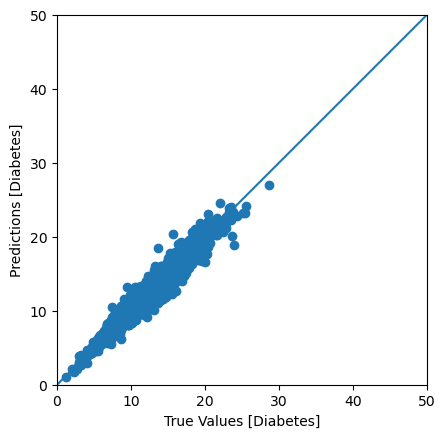

In [21]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Diabetes]')
plt.ylabel('Predictions [Diabetes]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Text(0, 0.5, 'Count')

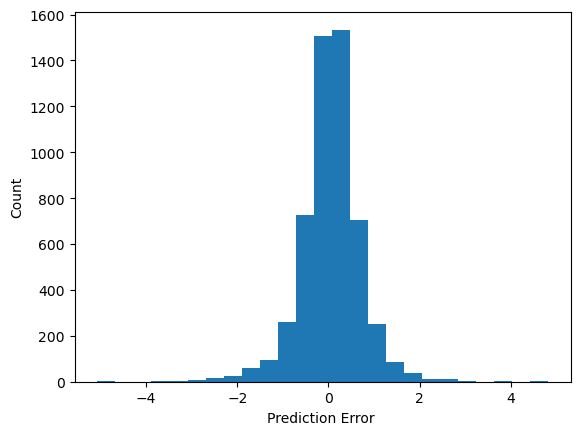

In [22]:
#Error Distribution
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error ')
plt.ylabel('Count')

In [23]:
dnn_model.save('diabetes_dnn_model.h5')


# Pickle the models

In [25]:
import pickle

# save the iris classification model as a pickle file
d_model_pkl_file = "diabetes_linear_regression_dnn_model.pkl"  

with open(d_model_pkl_file, 'wb') as file:  
    pickle.dump(dnn_model, file)